In [29]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# League of Legends Predictor - Insights

This Jupyter Notebook is dedicated to gaining insights using data analysis into what are important attributes when it comes to winning the game of League of Legends.

The *match_summary_min.csv* data files were derived by my own script (found in the **riotGamesAPI.py** file). The script allows to specify the desired minute to which the match summary should be made. In this work I have decided to investigate the matches at times between **5-40** minutes. As not a lot happens before 5 minutes into the match, that time will not be analysed.

Matches from 4 game servers (NA, EUNE, EUW, KR) are analyzed.

# Analyzing EUNE server features

### Data Structure

Let´s first look at how the data is structured.

In [30]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

dir_path_eune = os.path.join(os.getcwd(), "data", "eun1")

max_min = 40 #min
min_min = 5 #min
n_files = max_min-min_min+1
data = {}

for i in range(n_files):
    data["data_"+str(5+i)+"min_eune"] = pd.read_csv(os.path.join(dir_path_eune, "match_summary_"+str(5+i)+"min_eun1.csv"), 
                                               dtype=int, 
                                               index_col=0)

The games are summarized in terms of the following features/attributes:

In [31]:
print(", ".join(list(data["data_5min_eune"].keys())))

blueWin, blueGold, blueExp, blueLvl, blueCS, blueJngCS, blueVisionScore, blueTowerScore, blueInhibScore, blueDrakeScore, blueHeraldScore, blueBaronScore, blueKillScore, blueDeathScore, blueAssistScore, blueFirstHerald, blueFirstDrake, blueFirstBaron, blueFirstElder, blueDrakeSoul, redGold, redExp, redLvl, redCS, redJngCS, redVisionScore, redTowerScore, redInhibScore, redDrakeScore, redHeraldScore, redBaronScore, redKillScore, redDeathScore, redAssistScore, redFirstHerald, redFirstDrake, redFirstBaron, redFirstElder, redDrakeSoul, blueExpDiff, blueLvlDiff, blueGoldDiff, blueDrakeDiff, blueBaronDiff, blueHeraldDiff, blueTowerDiff, blueInhibDiff


The majority of the attributes are absolute, like **blueGold**, **blueExp** and others. They summarize the total power level of each of the teams, irrespective of the power level of the team. This absolute measure is more a measure of time elapsed in-game, thefore also have included other engineered features denoted by the suffix **-Diff**. These measure the relative power of both teams.

### General Data Properties

We have 6 data sets of different sizes. This is because some games end before 20 minutes as an example. That means such a game cannot be included in that dataset. This gives some general information what is the distribution of game times in the games we have analyzed (with a 5 min resolution).

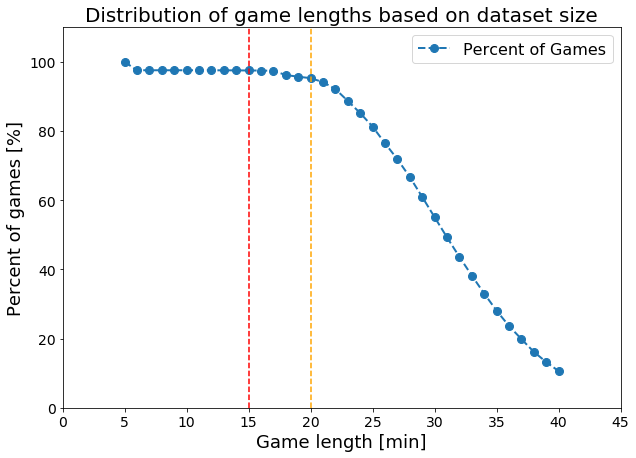

In [32]:
percent_games = [len(data["data_"+str(i + 5)+"min_eune"])/len(data["data_5min_eune"])*100 for i in range(n_files)]

fig, ax = plt.subplots(figsize=(10,7))
ax.set_title("Distribution of game lengths based on dataset size", fontsize=20)

ax.plot([5+i for i in range(n_files)], percent_games, marker='o', linestyle='dashed', linewidth=2, markersize=8)

ax.legend(["Percent of Games"], fontsize =16)
ax.set_xticklabels([0, 5, 10, 15, 20, 25, 30, 35, 40, 45], fontsize=14)
ax.axvline(x = 15, linestyle="--", color="red", label="15 min")
ax.axvline(x = 20, linestyle="--", color="orange", label="15 min")
ax.set_xlim(0, 45)
ax.set_ylim(0, 110)
ax.set_yticklabels([0, 20, 40, 60, 80, 100], fontsize=14)
ax.set_xlabel("Game length [min]", fontsize=18)
ax.set_ylabel("Percent of games [%]", fontsize=18)
plt.show()

As you can see, the vast majority of games lasts at least 20 minutes. Only 80% of games are longer than 25 minutes and only 60% of games is longer than 30 minutes. A pretty large drop of can be seen at 30 minutes after which the proportion of games that lasts longer falls steadily.

We have highlighted the boundaries at <b><span style="color:red">15</span></b> and <b><span style="color:orange">20</span></b> minutes. These are noteworthy because at these times the surrender feature becomes available to the teams. At <b><span style="color:red">15 minutes</span></b> all 5 teammates have to agree to the surrender, while at <b><span style="color:orange">20 minutes</span></b> only 4 teammates have to agree to the surrender. Still a very small portion of the games seems to end in such a way at these specific times.

### Correlations

Let´s look at what is important to win the game. This can be done for each dataset, somewhat tentatively showing what is most important to win the game at each point of the game. Keep in mind, that especially for the earliest datasets (<15min) a lot of the game time still has to be played, so we expect these correlations to be relatively weak.

In [33]:
data["data_40min_eune"].corr()["blueWin"].sort_values(ascending=False)

blueWin            1.000000
blueGoldDiff       0.507793
blueExpDiff        0.503528
blueLvlDiff        0.474419
blueDrakeScore     0.374817
blueDrakeDiff      0.372666
blueDrakeSoul      0.297164
blueExp            0.293222
blueLvl            0.280560
blueGold           0.278461
blueTowerDiff      0.269476
blueInhibDiff      0.261993
blueTowerScore     0.240225
blueBaronDiff      0.237877
blueJngCS          0.233728
blueBaronScore     0.223013
blueInhibScore     0.211876
blueFirstBaron     0.189294
redDeathScore      0.166927
blueKillScore      0.166927
blueAssistScore    0.162719
blueFirstElder     0.094899
redCS              0.046964
blueFirstDrake     0.044519
redHeraldScore     0.034644
redFirstHerald     0.022986
blueCS            -0.009903
redVisionScore    -0.010418
blueVisionScore   -0.017310
blueFirstHerald   -0.022986
blueHeraldScore   -0.029255
blueHeraldDiff    -0.034420
redFirstDrake     -0.044519
redFirstElder     -0.099271
redAssistScore    -0.160248
redFirstBaron     -0

As yu can see, a lot of the values are *NaN*. There is nothing wrong with the data. Instead, noting that the data we inspected was for after 5 minutes of play, no drakes, heralds, barons, towers and so on could be taken at that point of the game. So that data is not relevant at that time.

In [34]:
features = list(data["data_5min_eune"].keys())[1:]

correlations = {key: [] for key in features}
for summary in data.values():
    corr = summary.corr()["blueWin"]    
    for key in features:
        correlations[key].append(corr[key])

Let´s plot the correlation coefficients of all of the parameters for the different game lengths.

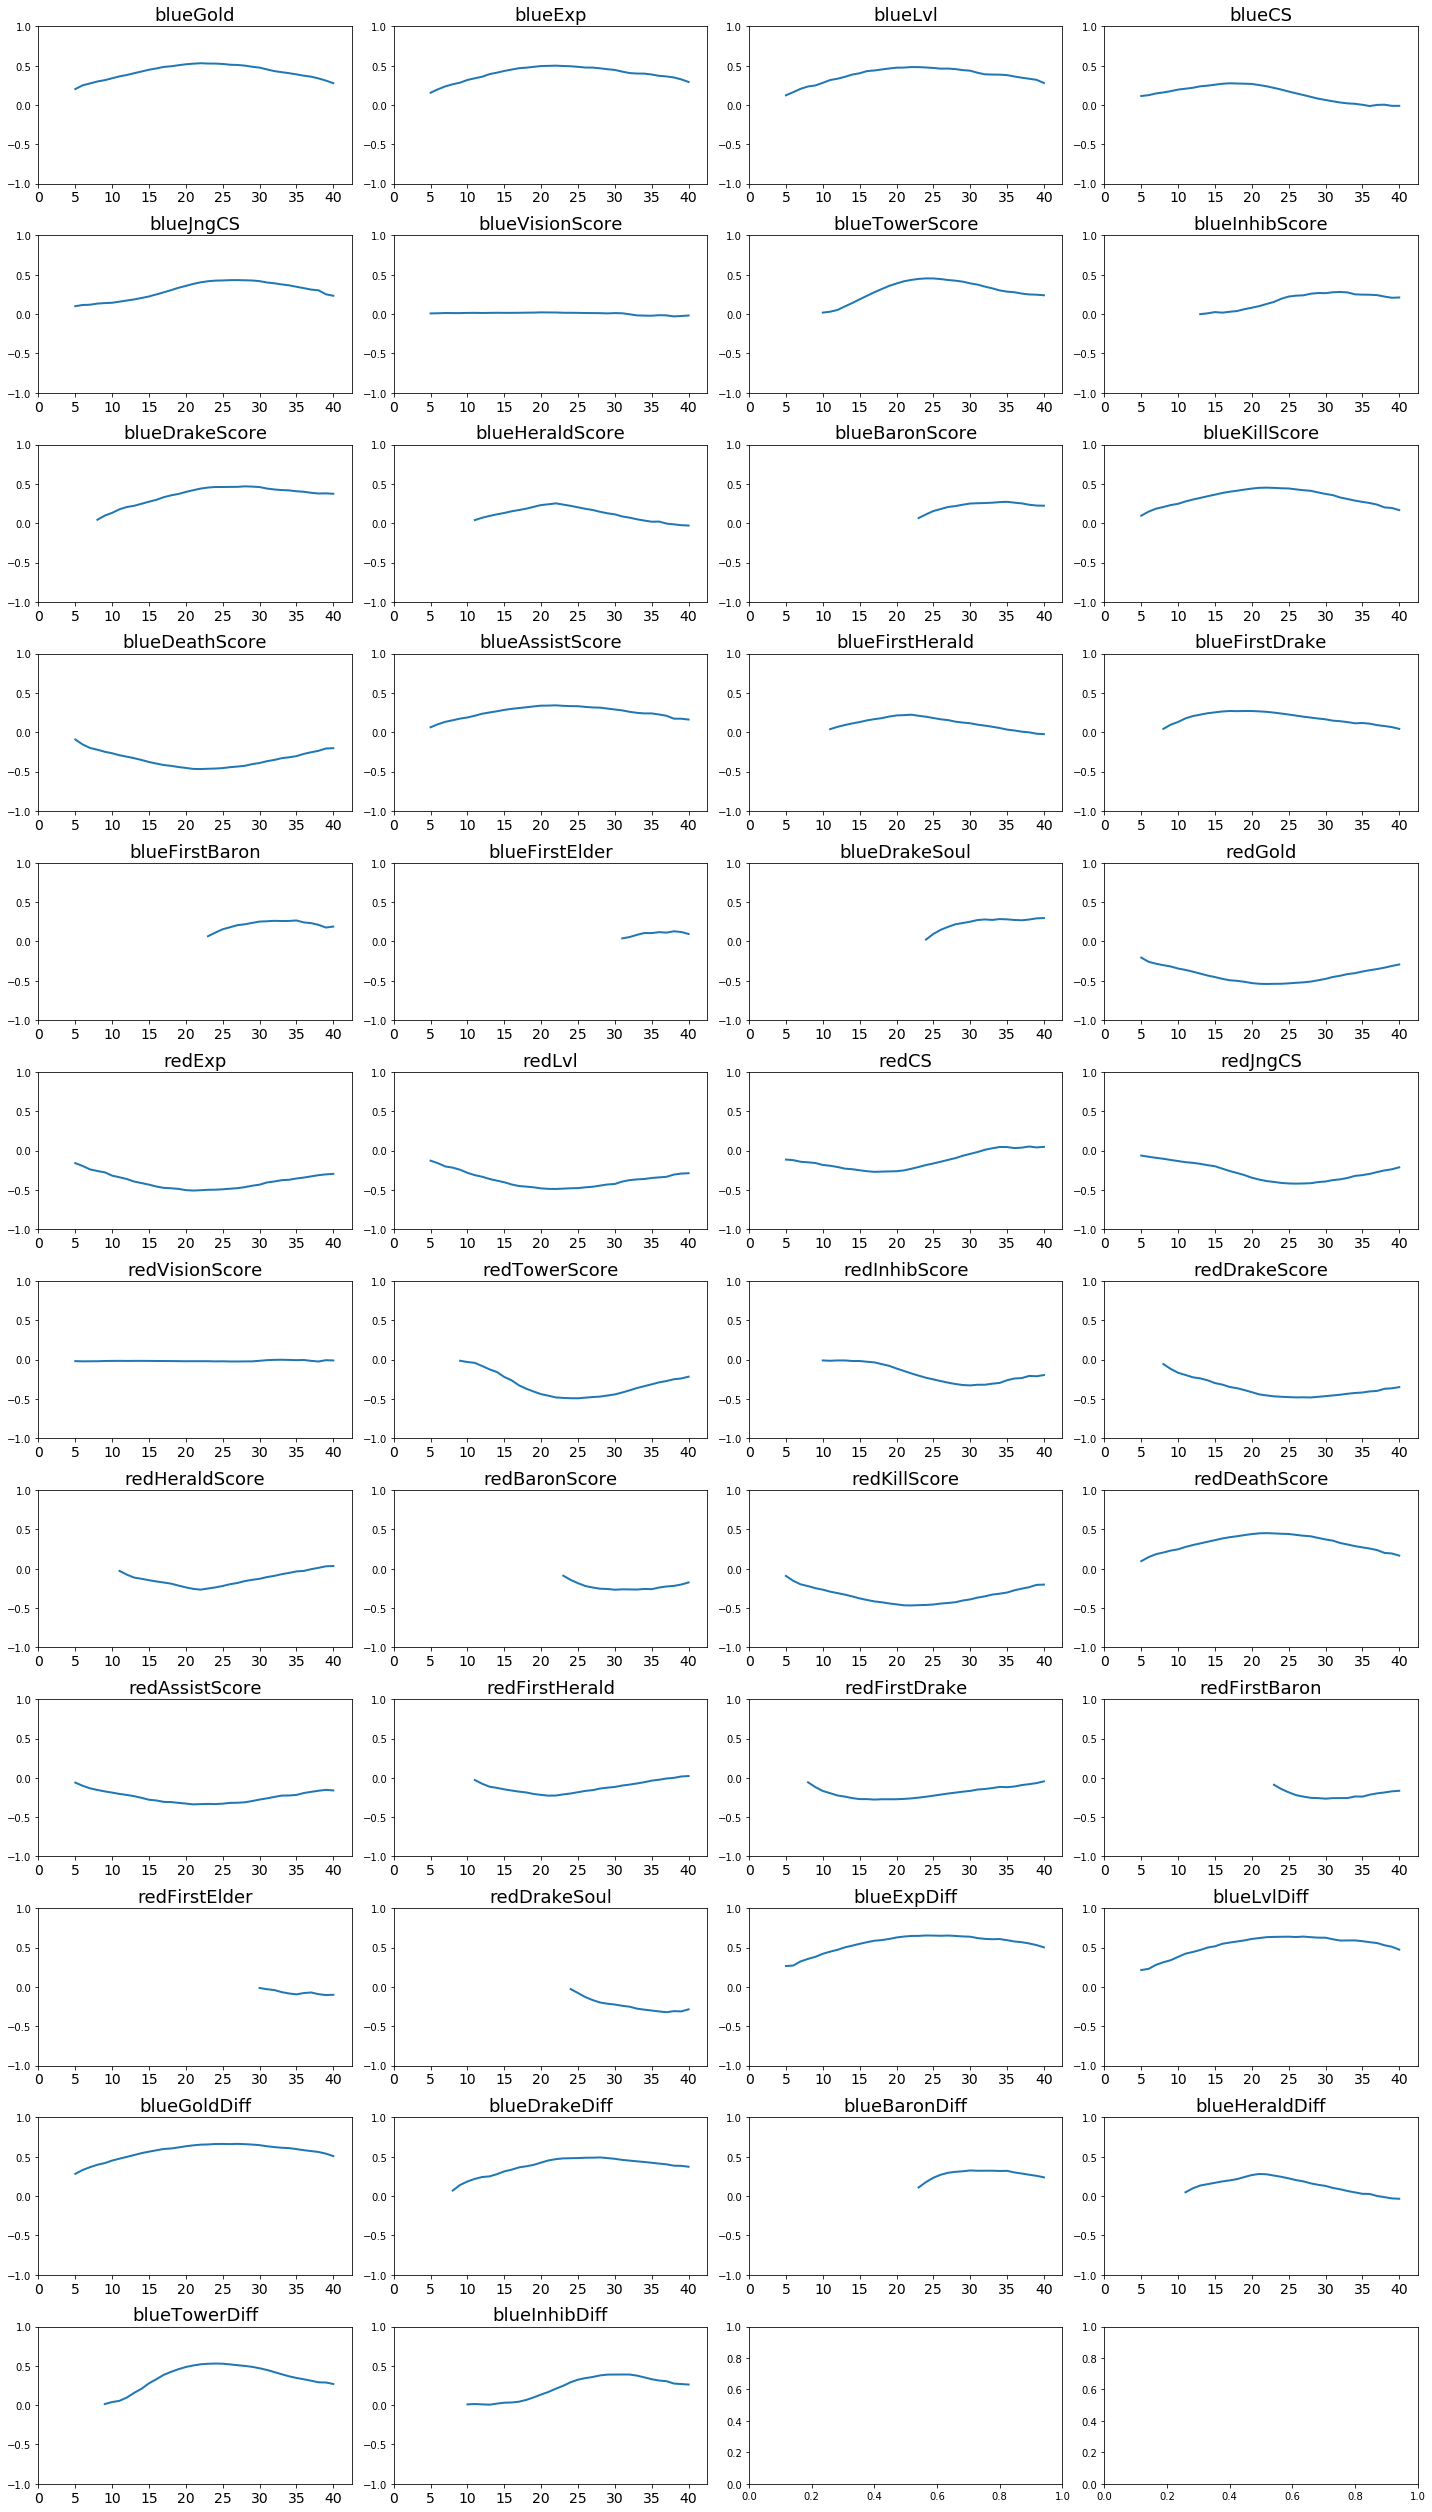

In [35]:
n_rows = 12
n_columns = 4
x_axis = [i+5 for i in range(n_files)]
corr_index = np.array([i for i in range(n_rows*n_columns)]).reshape((n_rows, -1))

fig, ax = plt.subplots(n_rows, n_columns, figsize=(20,35))
 
for k in range(n_rows):
    for l in range(n_columns):
        try:
            feature = features[corr_index[k, l]]
            ax[k, l].set_title(feature, fontsize=18)
            ax[k, l].plot(x_axis, correlations[feature], linestyle='-', linewidth=2)
            ax[k, l].set_xlim(0, 42.5)
            ax[k, l].set_xticklabels([0, 5, 10, 15, 20, 25, 30, 35, 40], fontsize=14)
            ax[k, l].set_ylim(-1, 1)
        except:
            pass
plt.tight_layout()      
plt.show()

Some interesting and unexpected observations can be made. 

Let´s first look at the features associated with heralds, ie. **blueHeraldScore**, **blueHeraldDiff**. One can see that its correlation with winning is largest at 20 minutes and falls of as the game gets longer. Furthermore, at 30 min killing the herald seems to lose all correlation with winning if the game reaches 30 minutes.

It´s also interesting to look at **blueGold**, **blueExp** and **blueKillScore**. It´s correlation is biggest at 20 minutes after which is saturates and even starts to fall. This indicates that at very long game times (>30min), if the team has a significant gold/exp/lvl/kill lead and has not been able to win the game, the likelihood of winning the game starts to drop. Also at these times, players have already accumulated a lot of the gold and experience that is usefull as players can build only 6 items and have a maximum level of 18. This means that gold and exp at that time becomes irrelevant.

Let´s now try to visualize the data somehow. We will decompose the data using t-SNE and PCA into 2D and 3D to try to see if a clear decision boundary arises for our future machine learning efforts.

In [36]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

y = np.array(data["data_40min_eune"]["blueWin"])
X = data["data_40min_eune"].drop("blueWin", axis=1).values

X_tsne_2D = TSNE(n_components=2).fit_transform(StandardScaler().fit_transform(X))
X_tsne_3D = TSNE(n_components=3).fit_transform(StandardScaler().fit_transform(X))
print("t_SNE finished.")
X_pca_2D = PCA(n_components=2).fit_transform(StandardScaler().fit_transform(X))
X_pca_3D = PCA(n_components=3).fit_transform(StandardScaler().fit_transform(X))
print("PCA finished.")

t_SNE finished.
PCA finished.


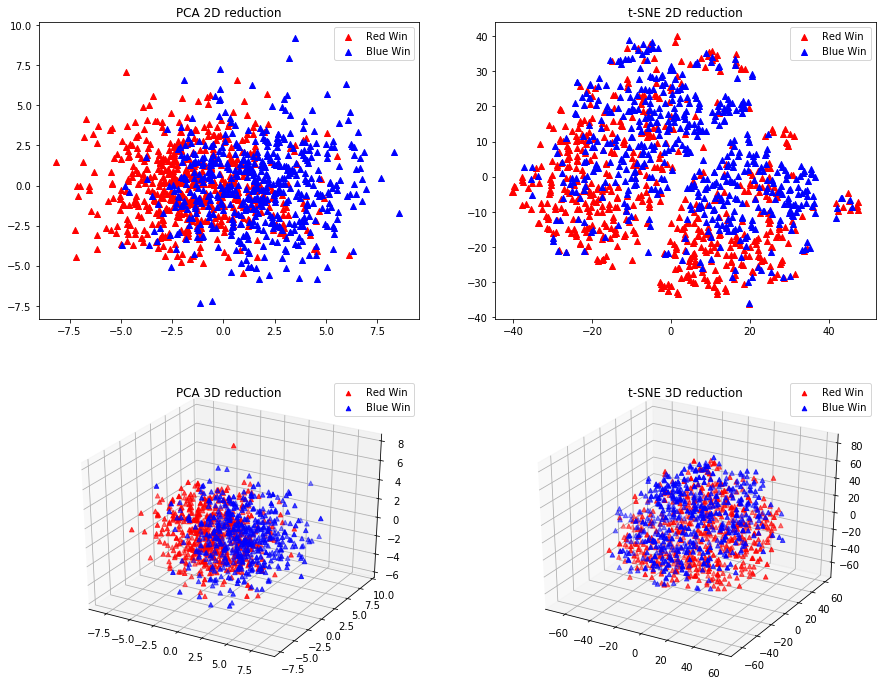

In [37]:
from mpl_toolkits.mplot3d.axes3d import get_test_data
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

leg = ["Red Win", "Blue Win"]

fig = plt.figure(figsize=(15,12))
gs = fig.add_gridspec(2, 2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0], projection='3d')
ax4 = fig.add_subplot(gs[1, 1], projection='3d')

ax1.set_title("PCA 2D reduction")
ax2.set_title("t-SNE 2D reduction")
ax3.set_title("PCA 3D reduction")
ax4.set_title("t-SNE 3D reduction")

# PCA 2D reduction
ax1.scatter(X_pca_2D[y==0, 0], X_pca_2D[y==0, 1], c="red", marker="^")
ax1.scatter(X_pca_2D[y==1, 0], X_pca_2D[y==1, 1], c="blue", marker="^")

# t-SNE 2D reduction
ax2.scatter(X_tsne_2D[y==0, 0], X_tsne_2D[y==0, 1], c="red", marker="^")
ax2.scatter(X_tsne_2D[y==1, 0], X_tsne_2D[y==1, 1], c="blue", marker="^")

# PCA 3D reduction
ax3.scatter(X_pca_3D[y==0, 0], X_pca_3D[y==0, 1], X_pca_3D[y==0, 2], c="red", marker="^")
ax3.scatter(X_pca_3D[y==1, 0], X_pca_3D[y==1, 1], X_pca_3D[y==1, 2], c="blue", marker="^")

# t-SNE 3D reduction
ax4.scatter(X_tsne_3D[y==0, 0], X_tsne_3D[y==0, 1], X_tsne_3D[y==0, 2], c="red", marker="^")
ax4.scatter(X_tsne_3D[y==1, 0], X_tsne_3D[y==1, 1], X_tsne_3D[y==1, 2], c="blue", marker="^")

ax1.legend(leg)
ax2.legend(leg)
ax3.legend(leg)
ax4.legend(leg)

plt.show()

The data is not linearly seperable at 2 or 3 dimensions, which means we will most likely need many more features to accurately predict the game winner.

# Comparing regions

Let´s compare the importance of the features for each server.

In [38]:
dir_path_eune = os.path.join(os.getcwd(), "data", "eun1")
dir_path_euw = os.path.join(os.getcwd(), "data", "euw1")
dir_path_na = os.path.join(os.getcwd(), "data", "na1")
dir_path_kr = os.path.join(os.getcwd(), "data", "kr")

max_min = 40 #min
min_min = 5 #min
n_files = max_min-min_min+1
data_eun = {}
data_euw = {}
data_na = {}
data_kr = {}

for i in range(n_files):
    data_eun["data_"+str(5+i)+"min"] = pd.read_csv(os.path.join(dir_path_eune, "match_summary_"+str(5+i)+"min_eun1.csv"), 
                                               dtype=int, 
                                               index_col=0)
    data_euw["data_"+str(5+i)+"min"] = pd.read_csv(os.path.join(dir_path_euw, "match_summary_"+str(5+i)+"min_euw1.csv"), 
                                               dtype=int, 
                                               index_col=0)
    data_na["data_"+str(5+i)+"min"] = pd.read_csv(os.path.join(dir_path_na, "match_summary_"+str(5+i)+"min_na1.csv"), 
                                               dtype=int, 
                                               index_col=0)
    data_kr["data_"+str(5+i)+"min"] = pd.read_csv(os.path.join(dir_path_kr, "match_summary_"+str(5+i)+"min_kr.csv"), 
                                               dtype=int, 
                                               index_col=0)

Let´s look at the game length distribution on each server, as differing game lenghts would most certainly impact the importance of each feature.

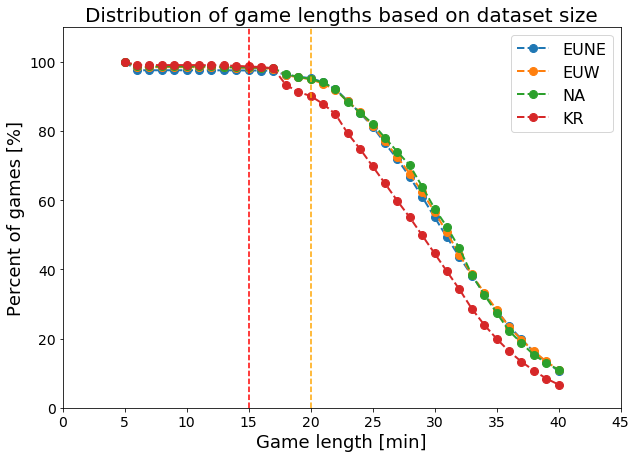

In [39]:
percent_games_eun = [len(data_eun["data_"+str(i + 5)+"min"])/len(data_eun["data_5min"])*100 for i in range(n_files)]
percent_games_euw = [len(data_euw["data_"+str(i + 5)+"min"])/len(data_euw["data_5min"])*100 for i in range(n_files)]
percent_games_na = [len(data_na["data_"+str(i + 5)+"min"])/len(data_na["data_5min"])*100 for i in range(n_files)]
percent_games_kr = [len(data_kr["data_"+str(i + 5)+"min"])/len(data_kr["data_5min"])*100 for i in range(n_files)]

fig, ax = plt.subplots(figsize=(10,7))
ax.set_title("Distribution of game lengths based on dataset size", fontsize=20)

ax.plot([5+i for i in range(n_files)], percent_games_eun, marker='o', linestyle='dashed', linewidth=2, markersize=8)
ax.plot([5+i for i in range(n_files)], percent_games_euw, marker='o', linestyle='dashed', linewidth=2, markersize=8)
ax.plot([5+i for i in range(n_files)], percent_games_na, marker='o', linestyle='dashed', linewidth=2, markersize=8)
ax.plot([5+i for i in range(n_files)], percent_games_kr, marker='o', linestyle='dashed', linewidth=2, markersize=8)

ax.legend(["EUNE", "EUW", "NA", "KR"], fontsize =16)
ax.set_xticklabels([0, 5, 10, 15, 20, 25, 30, 35, 40, 45], fontsize=14)
ax.axvline(x = 15, linestyle="--", color="red", label="15 min")
ax.axvline(x = 20, linestyle="--", color="orange", label="15 min")
ax.set_xlim(0, 45)
ax.set_ylim(0, 110)
ax.set_yticklabels([0, 20, 40, 60, 80, 100], fontsize=14)
ax.set_xlabel("Game length [min]", fontsize=18)
ax.set_ylabel("Percent of games [%]", fontsize=18)
plt.show()

Interestingly enough it seems that while the EUNE, EUW and NA servers have very similar game times, the KR server sees a sharp drop in games played past 17 minutes. It is unclear at this time why this is so.

Let´s now look at the correlations for each region.

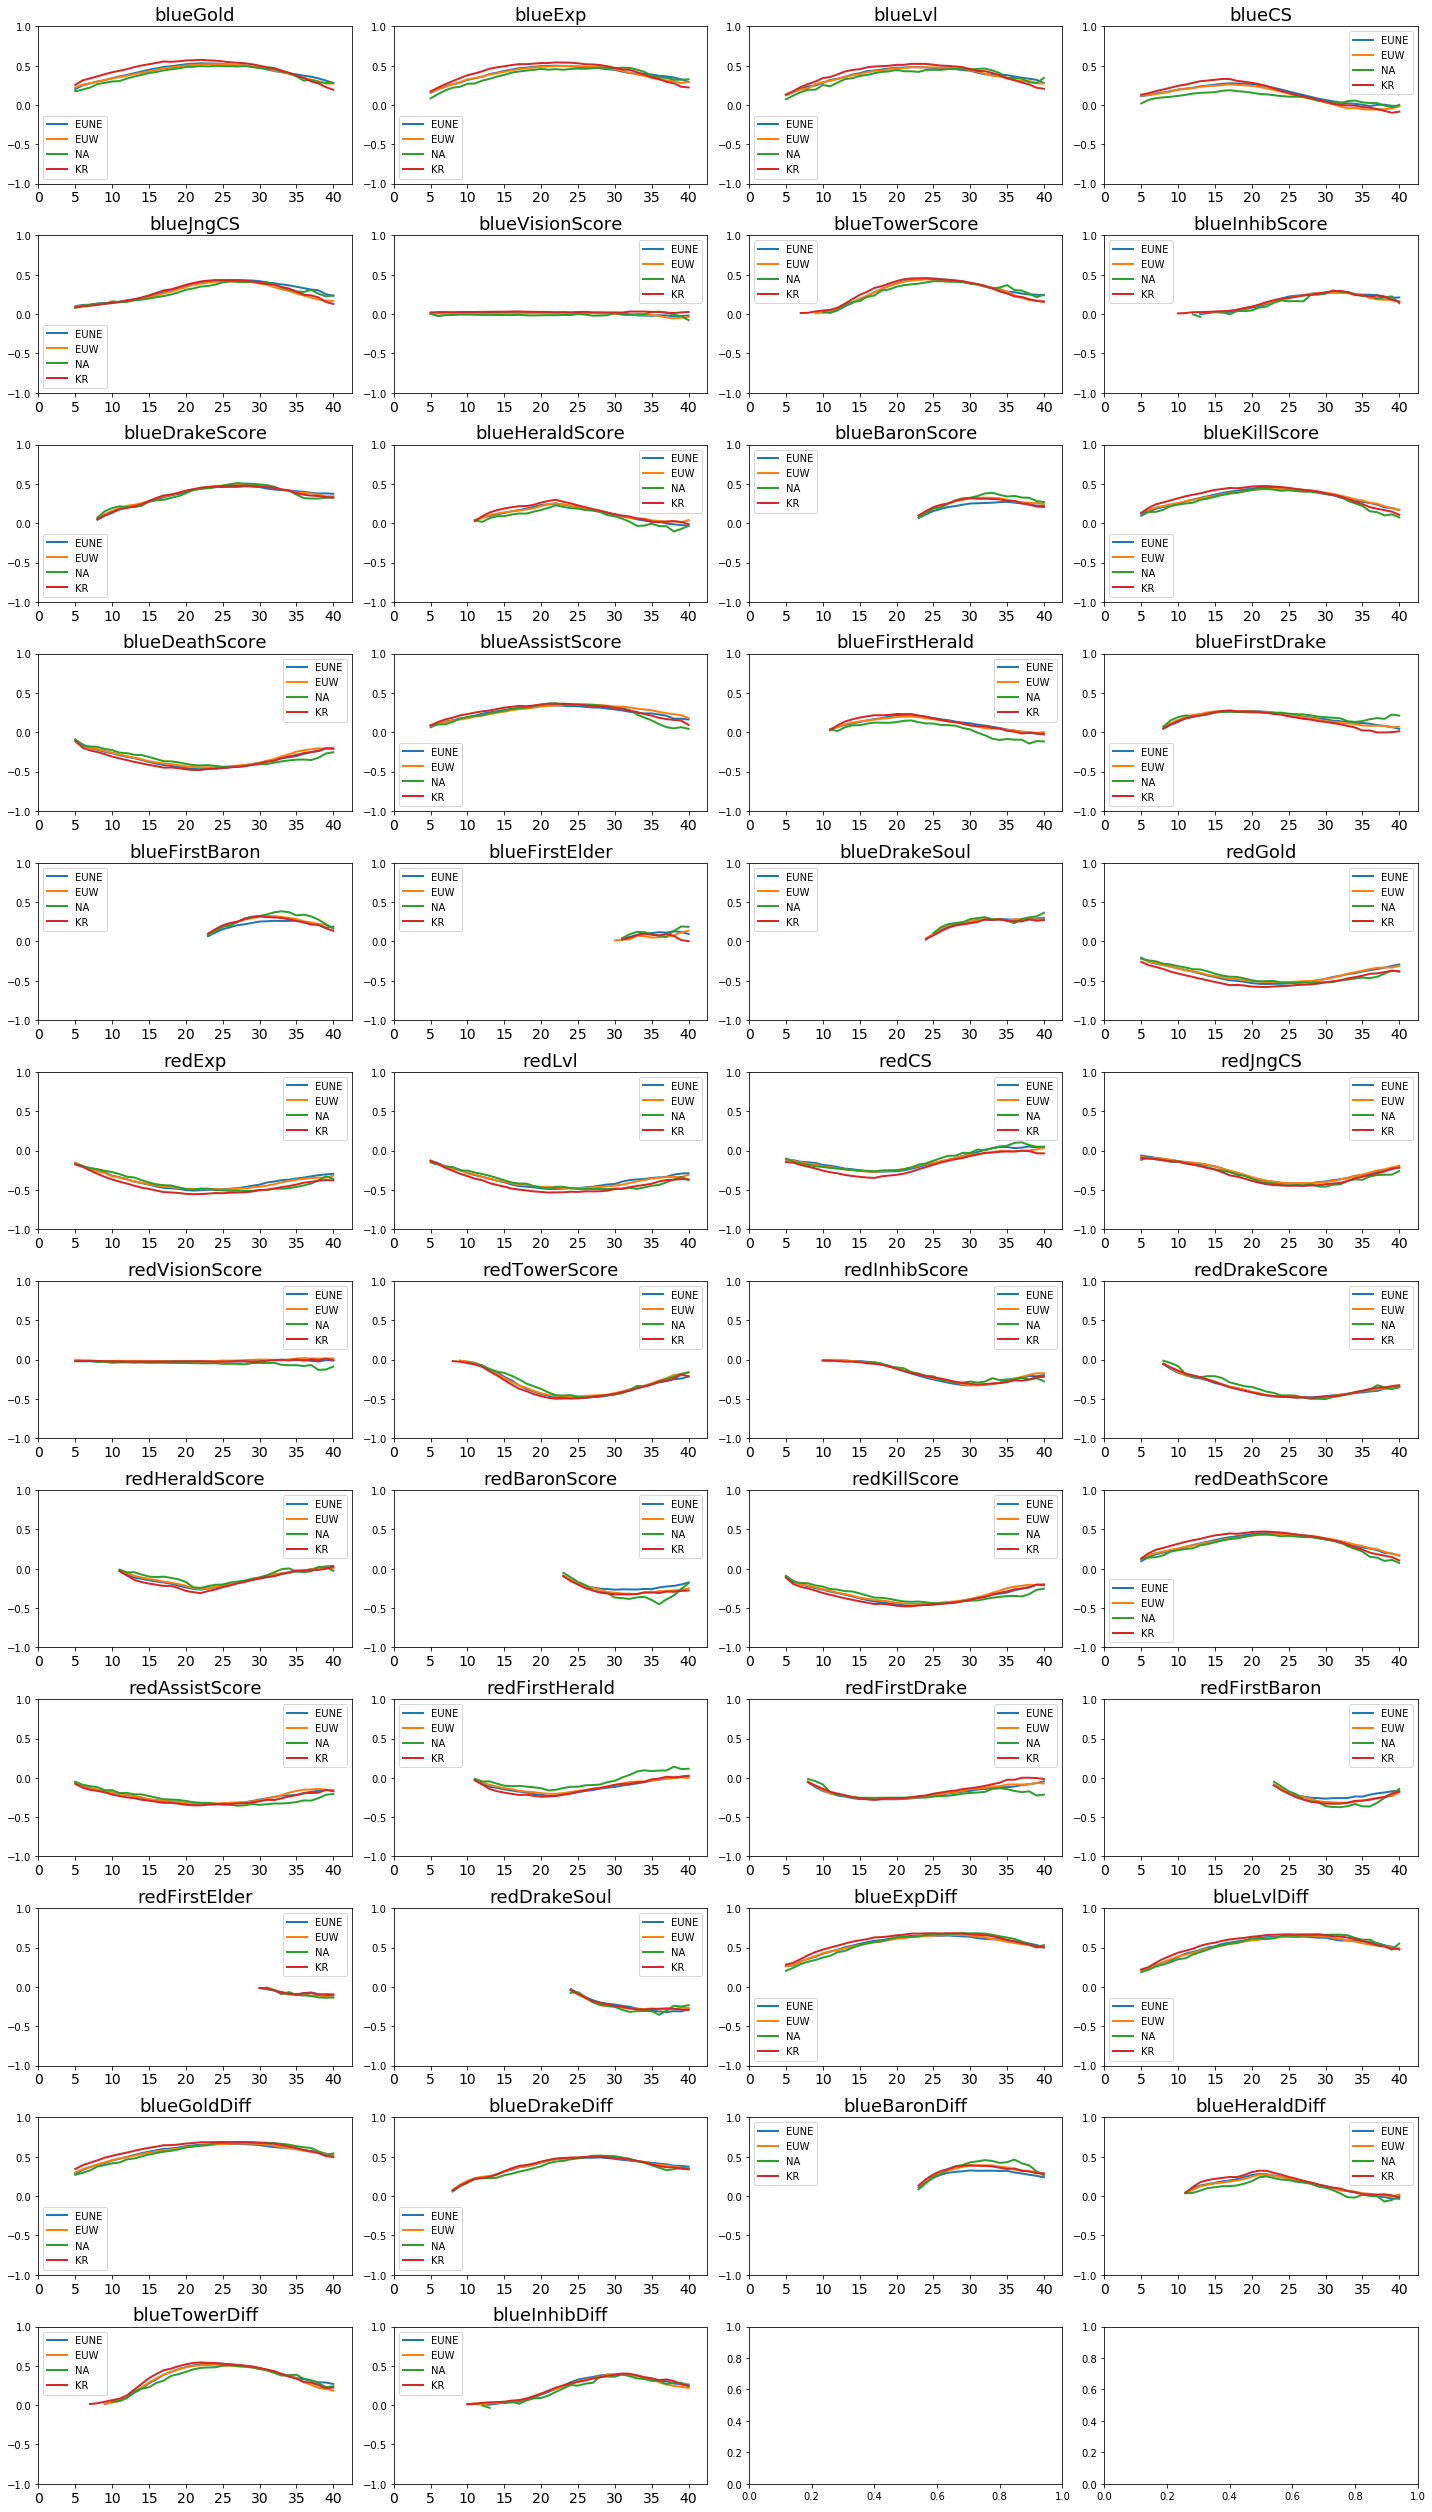

In [40]:
features = list(data_eun["data_5min"].keys())[1:]

correlations_eune = {key: [] for key in features}
correlations_euw = {key: [] for key in features}
correlations_na = {key: [] for key in features}
correlations_kr = {key: [] for key in features}
   
for key in features:
    
    for summary in data_eun.values():
        corr = summary.corr()["blueWin"]   
        correlations_eune[key].append(corr[key])
        
    for summary in data_euw.values():
        corr = summary.corr()["blueWin"]   
        correlations_euw[key].append(corr[key])
        
    for summary in data_na.values():
        corr = summary.corr()["blueWin"]   
        correlations_na[key].append(corr[key])
        
    for summary in data_kr.values():
        corr = summary.corr()["blueWin"]   
        correlations_kr[key].append(corr[key])
        
n_rows = 12
n_columns = 4
x_axis = [i+5 for i in range(n_files)]
corr_index = np.array([i for i in range(n_rows*n_columns)]).reshape((n_rows, -1))

fig, ax = plt.subplots(n_rows, n_columns, figsize=(20,35))
 
for k in range(n_rows):
    for l in range(n_columns):
        try:
            feature = features[corr_index[k, l]]
            ax[k, l].set_title(feature, fontsize=18)
            ax[k, l].plot(x_axis, correlations_eune[feature], linestyle='-', linewidth=2)
            ax[k, l].plot(x_axis, correlations_euw[feature], linestyle='-', linewidth=2)
            ax[k, l].plot(x_axis, correlations_na[feature], linestyle='-', linewidth=2)
            ax[k, l].plot(x_axis, correlations_kr[feature], linestyle='-', linewidth=2)
            ax[k, l].legend(["EUNE", "EUW", "NA", "KR"])
            ax[k, l].set_xlim(0, 42.5)
            ax[k, l].set_xticklabels([0, 5, 10, 15, 20, 25, 30, 35, 40], fontsize=14)
            ax[k, l].set_ylim(-1, 1)
        except:
            pass
plt.tight_layout()      
plt.show()

The correlations seem to be quite similar between regions. However we can observe that some divergence between the correlations in the regions occurs at very long game length. This could be a realistic feature or it can be just a consequnce of the fact that a much smaller portion of games even lasts this long. This simply means we have a smaller sample size.